# Python Tutorial

## 4. Matplotlib

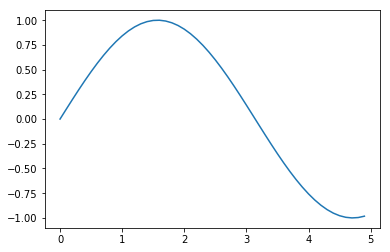

In [42]:
import numpy as np
import matplotlib.pyplot as plt
x = np.arange(0, 5, 0.1);
y = np.sin(x)
plt.plot(x, y)
plt.show()
plt.cla()
plt.close("all")

### 4.1 Thermodynamic Integration

[17.3781, 15.7336, 12.181]
15.415583333333334


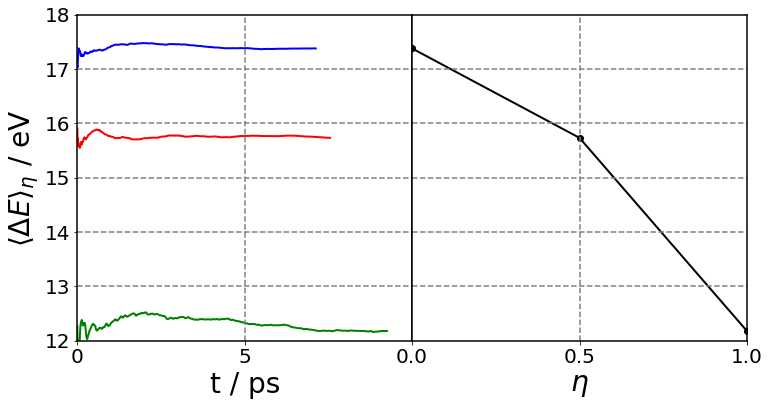

In [88]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

### def functions
def get_xy(file_name):
    data = np.loadtxt(file_name)
    x_data=data[:, 0]
    ave_data=data[:, 2]
    return x_data, ave_data

def TI(data):
    TI_out = (data[0]+data[2])/6 + 2*data[1]/3
    return TI_out

### para
plot_fig=0

lw=2
lw2=1.5
fs=28
fs2=20
eta_three=[0, 0.5, 1]
Free_ener_three=[0, 0, 0]

### read data
file0="4.1Thermodynamicintegration/data0.txt"
file1="4.1Thermodynamicintegration/data1.txt"
file2="4.1Thermodynamicintegration/data2.txt"

x_0, y_0 = get_xy(file0)
x_1, y_1 = get_xy(file1)
x_2, y_2 = get_xy(file2)

Free_ener_three[0] = y_0[-1]
Free_ener_three[1] = y_1[-1]
Free_ener_three[2] = y_2[-1]

### ini
if plot_fig ==0:
    figure_1 = plt.figure(figsize=(12, 6))
if plot_fig ==1:
    figure_1 = plt.figure(figsize=(12, 6), dpi=500)

gs1 = gridspec.GridSpec(1, 4)
gs1.update(wspace=0)

### setting
sp_1 = plt.subplot(gs1[-1, :-2])
ax=plt.gca()
ax.spines['bottom'].set_linewidth(lw2)
ax.spines['left'].set_linewidth(lw2)
ax.spines['right'].set_linewidth(lw2)
ax.spines['top'].set_linewidth(lw2)
plt.ylabel(r'$\langle\Delta E\rangle_{\eta}$ / eV',fontsize=fs)
plt.xlabel(r't / ps', fontsize=fs)
plt.xlim(0, 10)
plt.ylim(12,18)
my_x_ticks = np.arange(0, 10, 5)
my_y_ticks = np.arange(12, 19,1)
plt.xticks(my_x_ticks,fontsize=fs2)
plt.yticks(my_y_ticks,fontsize=fs2)

### plot
plt.plot(x_0, y_0, "b-", linewidth=lw)
plt.plot(x_1, y_1, "r-", linewidth=lw)
plt.plot(x_2, y_2, "g-", linewidth=lw)

### grid
for i in np.arange(13, 18, 1):
    plt.axhline(i, ls='--', color='gray')

plt.axvline(5, ls='--', color='gray')
plt.axvline(10, ls='--', color='gray')

### sub plot2
sp_2 = plt.subplot(gs1[-1, -2:])
ax=plt.gca()
ax.spines['bottom'].set_linewidth(lw2)
ax.spines['left'].set_linewidth(lw2)
ax.spines['right'].set_linewidth(lw2)
ax.spines['top'].set_linewidth(lw2)

plt.ylim(12, 18)
plt.xlim(0,1)

my_y_ticks = []
plt.yticks(my_y_ticks,fontsize=fs)
my_x_ticks = np.arange(0, 1.2, 0.5)
plt.xticks(my_x_ticks,fontsize=fs2)
plt.xlabel(r'$\eta$', fontsize=fs)

plt.plot(eta_three, Free_ener_three,"ko-", linewidth=lw)

for i in np.arange(13, 18, 1):
    plt.axhline(i, ls='--', color='gray')

plt.axvline(0.5, ls='--', color='gray')

print(Free_ener_three)
print(TI(Free_ener_three))

if plot_fig ==0:
    plt.show()
if plot_fig ==1:
    plt.savefig("plot.png",bbox_inches = 'tight')
plt.cla()
plt.close("all")

### 4.2 Energy Levels

[[-0.29  2.31  2.  ]
 [-1.29  3.31  2.  ]
 [-0.39  1.31  0.9 ]
 [-0.99  2.01  1.5 ]
 [-2.39  4.01  2.2 ]
 [-2.39  4.01  2.2 ]]


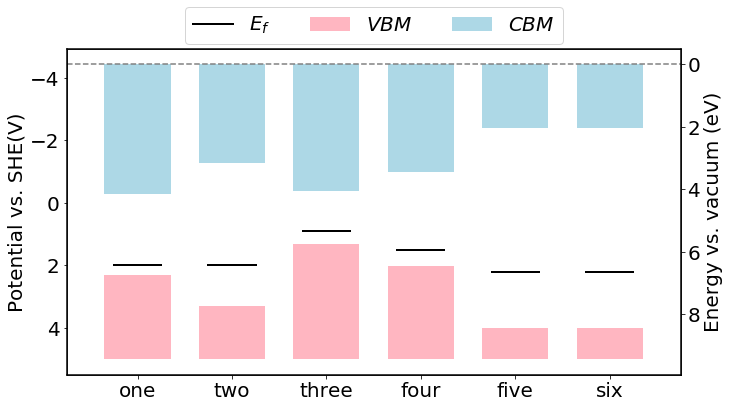

In [89]:
import numpy as np
import matplotlib.pyplot as plt

plot_fig = 0
linewidth=2
fs=20
lw2=1.5
le=0.2
re=1.2

dif=0.2
diff_band=0.02
diff_lim = 0.5
h_lim=5.0
l_lim=-4.44

names= ["one", "two","three", "four", "five", "six"]
levels = np.loadtxt("4.2energylevels/energylevels.txt")
print(levels)

if plot_fig == 0:
    figure_1 = plt.figure(figsize=(len(levels)*1.5+2, 6))
if plot_fig == 1:
    figure_1 = plt.figure(figsize=(len(levels)*1.5+2, 6), dpi=500)
ax=plt.gca()
ax.spines['bottom'].set_linewidth(lw2)
ax.spines['left'].set_linewidth(lw2)
ax.spines['right'].set_linewidth(lw2)
ax.spines['top'].set_linewidth(lw2)

plt.xlim(0, len(levels)*2+1)
plt.ylim(l_lim-diff_lim, h_lim+diff_lim)

scale_ls = np.arange(len(levels))*2+1.5
plt.xticks(scale_ls, names, rotation=0, fontsize=fs)
plt.ylabel('Potential vs. SHE(V)',fontsize=fs)
plt.yticks(fontsize=fs)

for idx, level in enumerate(levels):
    pos = idx*2+1
    if idx == 0:
        plt.plot([pos-le+dif, pos+re-dif], [level[2], level[2]], color="black", lw=linewidth, label=r"$E_f$")
        plt.fill_between([pos-le, pos+re], [level[1], level[1]], [h_lim, h_lim], facecolor = "lightpink", label=r"$VBM$")
        plt.fill_between([pos-le, pos+re], [level[0], level[0]], [l_lim, l_lim], facecolor = "lightblue", label=r"$CBM$")
    else:
        plt.plot([pos-le+dif, pos+re-dif], [level[2], level[2]], color="black", lw=linewidth)
        plt.fill_between([pos-le, pos+re], [level[1], level[1]], [h_lim, h_lim], facecolor = "lightpink")
        plt.fill_between([pos-le, pos+re], [level[0], level[0]], [l_lim, l_lim], facecolor = "lightblue")

plt.legend(bbox_to_anchor=(0., 1.02, 1., .102), loc="center", ncol=3, fontsize=fs)

plt.gca().invert_yaxis()
plt.axhline(-4.44, ls='--', color='grey')

ax2 = ax.twinx()
plt.ylim(l_lim-diff_lim+4.44, h_lim+diff_lim+4.44)
plt.gca().invert_yaxis()
plt.yticks(fontsize=fs)
plt.ylabel('Energy vs. vacuum (eV)',fontsize=fs)

if plot_fig == 0:
    plt.show()
if plot_fig == 1:
    plt.savefig("energylevels.png",bbox_inches = 'tight')
plt.cla()
plt.close("all")


### 4.3 parabola

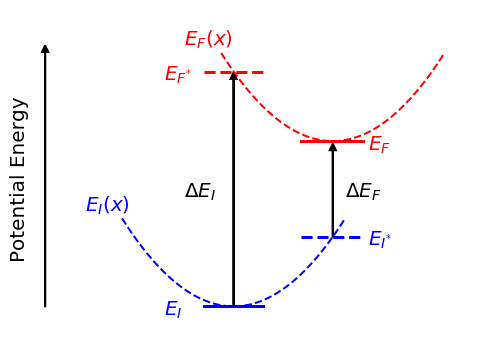

In [87]:
import numpy as np
import matplotlib.pyplot as plt

###para
lw = 2
fs = 20
plot_fig=0
sigma = 0.5

### X and Y
x_1=np.arange(0.5, 9.55, 0.05)
y_1=(x_1-5)**2

sigma = 0.3
x_2=np.arange(-3.5, 5.55, 0.05)
y_2=(x_2-1)**2-38

###if fig
if plot_fig==0:
    figure1=plt.figure(figsize=(8,6))
if plot_fig==1:
    figure1=plt.figure(figsize=(8,6), dpi=800)

### axis off
plt.axis('off')

### ylim and xlim
plt.ylim(-45,30)
plt.text(-8, 7, "Potential Energy", fontsize=fs, rotation=90)
plt.xlim(-7,11)

### plot
plt.plot(x_1, y_1, "r--", linewidth=lw)
plt.plot(x_2, y_2, "b--", linewidth=lw)

### dash lines and solid lines
plt.plot([-0.2, 2.2], [-38, -38], "b-", linewidth=3)
plt.plot([-0.2, 2.2], [16, 16], "r--", linewidth=3)
plt.plot([3.7, 6.2], [0, 0], "r-", linewidth=3)
plt.plot([3.7, 6.2], [-22, -22], "b--", linewidth=3)

### texts
plt.text(-1.8, 14, u'$E_{F^{*}}$',color="red", fontsize=fs)
plt.text(-1.8, -40, u'$E_{I}$',color="blue", fontsize=fs)
plt.text(6.4, -2, u'$E_{F}$',color="red", fontsize=fs)
plt.text(6.4, -24, u'$E_{I^{*}}$',color="blue", fontsize=fs)

plt.text(-1, 22, u'$E_{F}(x)$',color="red", fontsize=fs)
plt.text(-5, -16, u'$E_{I}(x)$',color="blue", fontsize=fs)
plt.text(-1.0, -13, r'$\Delta E_{I}$',color="black", fontsize=fs)
plt.text(5.5, -13, r'$\Delta E_{F}$',color="black", fontsize=fs)

### vertical arrows
A=[1,-38]
B=[1, 15.8]
plt.arrow(A[0], A[1], B[0]-A[0], B[1]-A[1],
             length_includes_head=True,linewidth=lw, ls="-",
             head_width=0.25, head_length=1.5, fc='black', ec='black')
A=[5,-22]
B=[5, -0.6]
plt.arrow(A[0], A[1], B[0]-A[0], B[1]-A[1],
             length_includes_head=True,linewidth=lw, ls="-",
             head_width=0.25, head_length=1.5, fc='black', ec='black')
A=[-6.6,-38]
B=[-6.6, 22]
plt.arrow(A[0], A[1], B[0]-A[0], B[1]-A[1],
             length_includes_head=True,linewidth=lw, ls="-",
             head_width=0.25, head_length=1.5, fc='black', ec='black')

### show or save fig
if plot_fig==0:
    plt.show()
if plot_fig==1:
    plt.savefig("parabola.png",bbox_inches = 'tight')
plt.cla()
plt.close("all")

### 4.4 SOAP

[ 0.000367  0.034388  0.149989 ...  0.021784 -0.031607  0.124583]
[[ 7.14126506e-02  8.26220317e-02]
 [-7.15828874e-03  2.40419140e-04]
 [-2.11738696e-01 -7.75321374e-02]
 ...
 [ 1.60773985e-01 -4.02271167e-01]
 [ 1.06315260e-01 -7.99035547e-02]
 [-2.78386589e-01 -1.10336141e-01]]


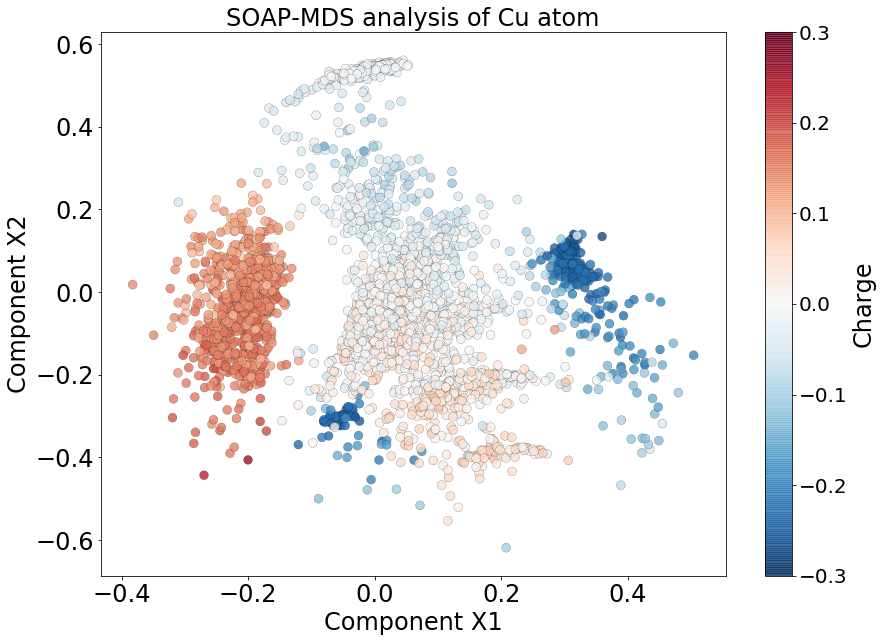

In [90]:
import numpy as np
import matplotlib.pyplot as plt

plot_fig=0
fs=24
lw2=3

charge = np.load("./4.4soap/charge.npy")
pos = np.load("4.4soap/pos.npy")
print(charge)
print(pos)

if plot_fig==0:
    figure1=plt.figure(figsize=(14, 10))
if plot_fig==1:
    figure1=plt.figure(figsize=(14, 10), dpi=400)   

cm = plt.cm.get_cmap('RdBu_r')
sc = plt.scatter(pos[:, 0], pos[:, 1], lw=0.2, label='NMDS', cmap=cm, c=charge, edgecolors='black', \
                 s=80, marker='o', alpha=0.8, vmin=-0.3, vmax=0.3)
cb = plt.colorbar(sc, ticks=np.linspace(-0.3, 0.3, 7))
cb.set_label(r'Charge', fontsize=fs)
cb.ax.tick_params(labelsize=fs-4)
plt.title('SOAP-MDS analysis of Cu atom', fontsize=fs)
plt.xlabel('Component X1', fontsize=fs)
plt.ylabel('Component X2', fontsize=fs)
plt.xticks(fontsize=fs)
plt.yticks(fontsize=fs)

if plot_fig==0:
    plt.show()
if plot_fig==1:
    plt.savefig("4.4soap/soap.png",bbox_inches = 'tight')
plt.cla()
plt.close("all")

### 4.5 PDOS

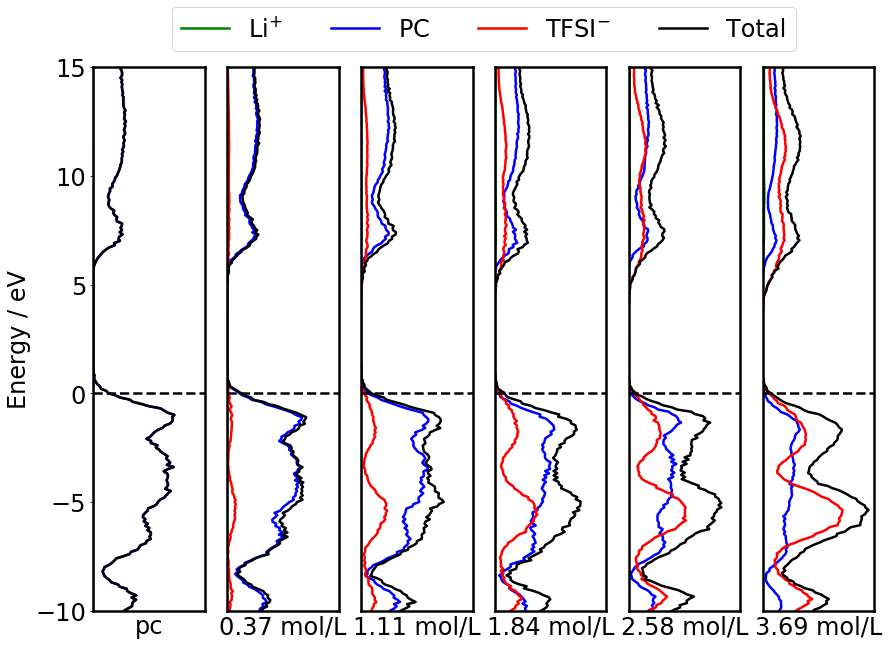

In [94]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

def get_dos(dos_file):
    data = np.loadtxt(dos_file)
    N = len(data)
    data_x = np.zeros(N)
    data_y = np.zeros(N)
    a = np.zeros(N)
    for i in range(N):
        data_x[i] = data[i][0]
        data_y[i] = data[i][1]
    return data_x, data_y

intensity=8.5
y_max=15
y_min=-10
plot_fig=0
lw=2.5
lw2=2.5
fs=24
xmax=9
file_names = ['pc', '0.37', '1.11', '1.84', '2.58', '3.69']

if plot_fig==1:
    plt.figure(figsize=(14, 10), dpi=500)
if plot_fig==0:
    plt.figure(figsize=(14, 10))

gs1 = gridspec.GridSpec(1, len(file_names))
gs1.update(wspace=0.2)

for idx, file_name in enumerate(file_names):
    sp_1 = plt.subplot(gs1[-1, idx])
    ax=plt.gca()
    ax.spines['bottom'].set_linewidth(lw2)
    ax.spines['left'].set_linewidth(lw2)
    ax.spines['right'].set_linewidth(lw2)
    ax.spines['top'].set_linewidth(lw2)

    if file_name == 'pc':
        plt.ylabel(r'Energy / eV',fontsize=fs)
        plt.gca().xaxis.set_ticks_position('top')
        my_y_ticks= np.arange(y_min, y_max+1, 5)
    else:
        my_y_ticks=[]
    
    my_x_ticks = []
    plt.xticks(my_x_ticks, fontsize=fs)
    plt.yticks(my_y_ticks, fontsize=fs)
    plt.gca().invert_yaxis()
    plt.ylim(y_min, y_max)
    plt.xlim(0, intensity)
    
    file_name_1 = "4.5pdos/li_"+file_name+".pdos"
    x1, y1 = get_dos(file_name_1)
    plt.plot(y1, x1, "g-", lw=lw, label=r'$\rm Li^{+}$')
    
    file_name_2 = "4.5pdos/pc_"+file_name+".pdos"
    x2, y2 = get_dos(file_name_2)
    plt.plot(y2, x2, "b-", lw=lw, label=r'$\rm PC$')
    
    if file_name != 'pc':
        file_name_3 = "4.5pdos/tfsi_"+file_name+".pdos"
        x3, y3 = get_dos(file_name_3)
        plt.plot(y3, x3, "r-", lw=lw, label=r'$\rm TFSI^{-}$')
    
    file_name_4 ="4.5pdos/"+file_name+"_total.pdos"
    x4, y4 = get_dos(file_name_4)
    plt.plot(y4, x4, "k-", lw=lw, label=u"Total")
    if file_name != 'pc':
        plt.xlabel(file_name+" mol/L" ,fontsize=fs)
    else:
        plt.xlabel(file_name ,fontsize=fs)
        
    plt.axhline(0, ls='--', color='black',linewidth=lw)
    if idx == 3:
        plt.legend(bbox_to_anchor=(-0.6, 1.02, 1., .102), loc="center", ncol=4, borderaxespad=0., fontsize=fs)

if plot_fig==0:
    plt.show()
if plot_fig==1:
    plt.savefig("4.5pdos/pdos.png",bbox_inches = 'tight')
plt.cla()
plt.close("all")